In [2]:
import pandas as pd
import numpy
import sys
import nltk
nltk.download('punkt')
import re
import unicodecsv as csv
import random
import matplotlib.pyplot as plt
from nltk import FreqDist
import math

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
raw_data = pd.read_csv("clustered_tweets.csv")
raw_data.head()

,Unnamed: 0,synopsis,cluster,format_
0,"(11,)",Economists on the TAX CUTS and JOBS ACT:\n\n“T...,11,0
1,"(0,)",The media has been speculating that I fired Re...,0,0
2,"(5,)",RT @WhiteHouse: President Trump proclaims toda...,5,0
3,"(0,)",Republicans Senators are working hard to pass ...,0,0
4,"(0,)",The jury was not told the killer of Kate was a...,0,0


## Visualize Length of Tweets

* We know Twitter used to have a 140 char limit, now it has been raised to 280
* When considering generating tweets, must generate a particular number of words and subsequent characters
* Rather than generating an arbitrary num of characters between [140,280] or even [0,280] (which would create far too many super short tweets), generate a length based on Trump's typical usage

In [119]:
raw_data_tweets = raw_data[raw_data.format_ == 0]
speeches = raw_data[raw_data.format_ == 1]
raw_data['length'] = raw_data_tweets.apply(lambda x: len(x.synopsis), axis=1)
raw_data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,synopsis,cluster,format_,length
0,"(11,)",Economists on the TAX CUTS and JOBS ACT:\n\n“T...,11,0,231.0
1,"(0,)",The media has been speculating that I fired Re...,0,0,275.0
2,"(5,)",RT @WhiteHouse: President Trump proclaims toda...,5,0,113.0
3,"(0,)",Republicans Senators are working hard to pass ...,0,0,279.0
4,"(0,)",The jury was not told the killer of Kate was a...,0,0,173.0


In [5]:
raw_data['length'].describe()

count    14173.000000
mean       116.417343
std         30.964453
min          2.000000
25%         98.000000
50%        129.000000
75%        139.000000
max        328.000000
Name: length, dtype: float64

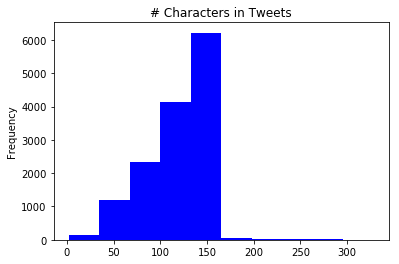

In [6]:
raw_data['length'].plot.hist(title="# Characters in Tweets", color='b')
plt.show()

In [7]:
def get_tweet_length():
    tweet_len_dist = raw_data['length'].value_counts()
    total_tweets = tweet_len_dist.sum()
    p = tweet_len_dist/total_tweets
    
    index = numpy.random.multinomial(1,p,1).argmax()
    return tweet_len_dist.index.values[index]

In [8]:
import csv
import string
import markovify
import shelve
import random
import time
import HTMLParser
import re
import spacy
import random
import pandas
from datetime import datetime

In [120]:
import markovify
import re
import spacy

nlp = spacy.load("en")

In [10]:
def train_spaCy_model(text):
    model = POSifiedText(text)
    return model

In [112]:
def generate_markov_tweet(cluster, num_tweets, state_size, tries, max_overlap_total):
    # Get tweets from cluster
    text = ""
    tweets_in_cluster = raw_data[raw_data.cluster == cluster]
    for tweet in tweets_in_cluster['synopsis']:
        text += tweet + " "
    
    model = markovify.Text(text, state_size)
    
    # Print randomly-generated sentences of no more than 280 characters
    # (number of characters based on tweet analysis)
    for i in range(num_tweets):
        length = get_tweet_length()
        print nlp(model.make_short_sentence(length,tries=tries,max_overlap_total=max_overlap_total).decode("utf-8")+"\n")

In [109]:
def get_hashtags(raw_data):
    hashtags = []
    for line in raw_data['synopsis']:
        if len(re.findall(r"#(\w+)", line)) > 0:
            hashtags += re.findall(r"#(\w+)", line)
    return hashtags

In [110]:
hashtags = get_hashtags(raw_data)
print hashtags

['WorldAIDSDay', 'DOW24K', 'MAGA', 'MakeAmericaGreatAgain', 'GivingTuesday', 'GES2017', 'GES2017', 'entrepreneurs', 'innovation', 'WhiteHouseChristmas', 'SmallBusinessSaturday', 'SmallBiz', 'ShopSmall', 'HappyThanksgiving', 'soldiers', 'Afghanistan', 'HappyThanksgiving', 'NCAAChampions', 'MS13', 'TaxCutsandJobsAct', 'POTUSinAsia', 'PearlHarbor', 'USA', 'FakeNews', 'ASEAN50', 'MakeAmericaGreatAgain', 'MAGA', 'ASEANSummit', 'ASEANSummit', 'APEC', 'NoKo', 'USMC242', 'SemperFi', 'APEC2017', 'APEC2017', 'APEC2017', 'APEC2017', 'APEC2017', 'APEC2017', 'APEC2017', 'NationalAssembly', 'POTUSinAsia', 'USA', 'Japan', 'USA', 'Japan', 'PearlHarbor', 'USA', 'WorldSeries', 'HoustonStrong', 'EarnHistory', 'NYCStrong', 'NYCStrong', 'USA', 'EndingWarOnCoal', 'TaxRefor', 'Halloween2017', 'FirstRespondersDay', 'JFKFiles', 'OpioidEpidemic', 'JFKFiles', 'FlashbackFriday', 'OpioidEpidemic', 'OpioidCrisis', 'AmericaFirst', 'TaxReform', 'TaxReform', 'JFKFiles', 'Dobbs', 'TaxReform', 'VegasStrong', 'PuertoRico

In [97]:
def get_mentions(raw_data):
    mentions = []
    for line in raw_data['synopsis']:
        if len(re.findall("@([a-zA-Z0-9]{1,15})", line)) > 0:
            mentions += re.findall(r"@(\w+)", line)
    return mentions

In [130]:
# mentions = get_mentions(raw_data)

In [105]:
def get_URLs(raw_data):
    URLs = []
    for line in raw_data['synopsis']:
        URL = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', line)
        if len(URL) > 0:
            URLs += URL
    return URLs

In [129]:
# URLs = get_URLs(raw_data)

In [128]:
# generate a tweet for each cluster
for x in xrange(0, 15):
    print "Tweet from cluster " + str(x) + ":"
    generate_markov_tweet(x, 1, 2, 100, 10) 

Tweet from cluster 0:
Remember to think small.

Tweet from cluster 1:
#AmericaFirst… https://t.co/6k7qP9X8nC Thank you New Hampshire!

Tweet from cluster 2:
We're a very exciting times.

Tweet from cluster 3:
We are w/ you tomorrow, and we are going to watch anymore.

Tweet from cluster 4:
Who knows?. You know they are doing....

Tweet from cluster 5:
Together, WE WILL WIN! https://t.co/2XBs5SSRC3 Join me live in Louisiana!

Tweet from cluster 6:
In many cases, by the Chinese government and safety to our country.

Tweet from cluster 7:
#MakeAmericaGreatAgain #Trump2016 https://t.co/uo287ZGvvQ Thank you- Nashua, New Hampshire!

Tweet from cluster 8:
I am running to be our partner in this incredible journey.

Tweet from cluster 9:
Thank you, everybody, thank you.

Tweet from cluster 10:
You have the best and most vicious ever.

Tweet from cluster 11:
We are proud of you.

Tweet from cluster 12:
This is America, this is the highest it's been in 45 years.

Tweet from cluster 13:
They said 